**Importing the necessary libraies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier 
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [5]:
dataframe= pd.read_csv("C:/Users/skkum/Desktop/project related files/preprocessed_data.csv")

In [6]:
dataframe.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,1,1,2,0,0,0,0,7,4,227,4,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,0,0
2,55,5,1,0,0,0,0,0,3,1,550,1,1,1
3,36,0,1,6,0,1,0,1,6,1,120,2,1,0
4,55,5,0,6,0,0,0,0,4,3,368,2,1,0


In [7]:
print('Shape of the data is: ',dataframe.shape)

Shape of the data is:  (32950, 14)


# **PREPARING THE TRAIN AND TEST DATA**

In [8]:
#Predictor Variables
X = dataframe.iloc[:,:-1]

# Target Variable
y = dataframe.iloc[:,-1]
pd.value_counts(y)

0    29238
1     3712
Name: y, dtype: int64

In [9]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,49,1,1,2,0,0,0,0,7,4,227,4,1
1,37,2,1,6,0,0,0,1,7,4,202,2,0
2,55,5,1,0,0,0,0,0,3,1,550,1,1
3,36,0,1,6,0,1,0,1,6,1,120,2,1
4,55,5,0,6,0,0,0,0,4,3,368,2,1


In [10]:
# Dividing the data into train and test subsets
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((26360, 13), (6590, 13), (26360,), (6590,))

## **RUNNING LOGISTIC REGRESSION MODEL**

In [22]:
model = LogisticRegression()

# fitting the model
model.fit(x_train, y_train)

# predicting the values
y_scores = model.predict(x_val)
y_scores

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf_rpt = classification_report(y_val,y_scores)
print("Classification Report")
print("-"*55)
print(clf_rpt)

Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.98      0.93      5798
           1       0.50      0.17      0.25       792

    accuracy                           0.88      6590
   macro avg       0.70      0.57      0.59      6590
weighted avg       0.85      0.88      0.85      6590



AREA UNDER THE CURVE IS :  0.5731264873641555
ROC_AUC_SCORE is 0.5731264873641555


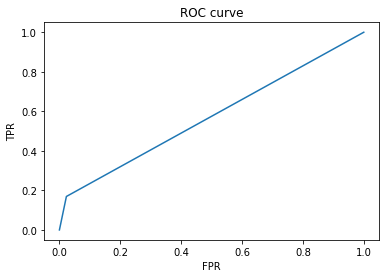

In [24]:
# getting the auc roc curve

auc = roc_auc_score(y_val, y_scores)
print("AREA UNDER THE CURVE IS : ", auc)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## **RUNNING DECISION TREE CLASSIFIER**

In [25]:
dtcmodel = DecisionTreeClassifier()
dtcmodel.fit(x_train, y_train)
y_scores = dtcmodel.predict(x_val)
y_scores

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf_rpt = classification_report(y_val,y_scores)
print("Classification Report")
print("-"*55)
print(clf_rpt)

Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      5798
           1       0.45      0.44      0.45       792

    accuracy                           0.87      6590
   macro avg       0.69      0.68      0.69      6590
weighted avg       0.87      0.87      0.87      6590



AREA UNDER THE CURVE IS :  0.6847678666624855
ROC_AUC_SCORE is 0.6847678666624855


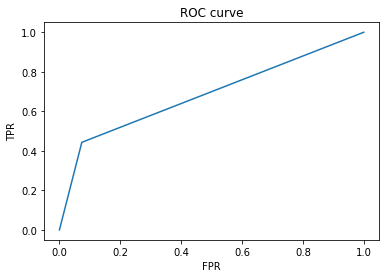

In [27]:
# getting the auc roc curve
auc = roc_auc_score(y_val, y_scores)
print("AREA UNDER THE CURVE IS : ", auc)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## **RUNNING RANDOM FORREST CLASSIFIER**

In [28]:
rfcmodel = RandomForestClassifier()

rfcmodel.fit(x_train, y_train)
y_scores = rfcmodel.predict(x_val)

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf_rpt = classification_report(y_val,y_scores)
print("Classification Report")
print("-"*55)
print(clf_rpt)

Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5798
           1       0.62      0.33      0.43       792

    accuracy                           0.90      6590
   macro avg       0.77      0.65      0.69      6590
weighted avg       0.88      0.90      0.88      6590



AREA UNDER THE CURVE IS :  0.6520650189372162
ROC_AUC_SCORE is 0.6520650189372162


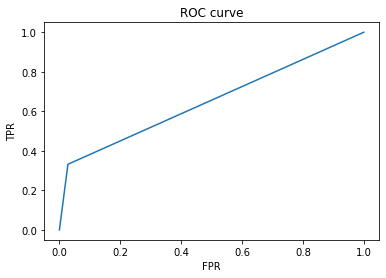

In [30]:
# getting the auc roc curve
auc = roc_auc_score(y_val, y_scores)
print("AREA UNDER THE CURVE IS : ", auc)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## **RUNNING SUPPORT VECTOR MACHINE**

In [31]:
svc=SVC()
svc.fit(x_train, y_train)
y_scores = svc.predict(x_val)

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf_rpt = classification_report(y_val,y_scores)
print("Classification Report")
print("-"*55)
print(clf_rpt)

Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      5798
           1       0.00      0.00      0.00       792

    accuracy                           0.88      6590
   macro avg       0.44      0.50      0.47      6590
weighted avg       0.77      0.88      0.82      6590



AREA UNDER THE CURVE IS :  0.6595268831815918
ROC_AUC_SCORE is 0.6595268831815918


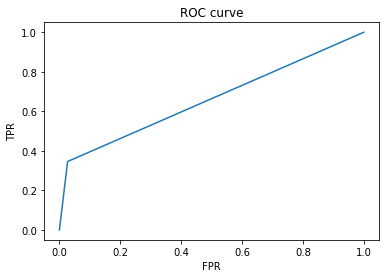

In [21]:
# getting the auc roc curve
auc = roc_auc_score(y_val, y_scores)
print("AREA UNDER THE CURVE IS : ", auc)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## **RUNNING K-NEAREST NEIGHBOUR**

In [33]:
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
y_scores = svc.predict(x_val)

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf_rpt = classification_report(y_val,y_scores)
print("Classification Report")
print("-"*55)
print(clf_rpt)

Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      5798
           1       0.00      0.00      0.00       792

    accuracy                           0.88      6590
   macro avg       0.44      0.50      0.47      6590
weighted avg       0.77      0.88      0.82      6590



AREA UNDER THE CURVE IS :  0.5
ROC_AUC_SCORE is 0.5


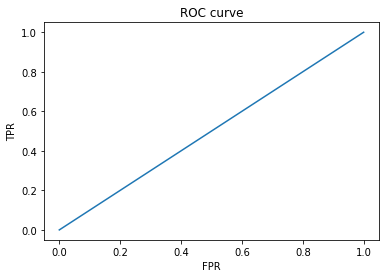

In [23]:
# getting the auc roc curve
auc = roc_auc_score(y_val, y_scores)
print("AREA UNDER THE CURVE IS : ", auc)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## From the above classification reports and AUC-ROC curve we get that only **Logistic Regression, Decision Tree** and **Random Forrest models** are of significance.

# FEATURE SELECTION

In [35]:
from sklearn.feature_selection import RFE

**For Logistic Regression Model**

In [36]:
#Selecting 8 number of features
models = LogisticRegression()

#using  rfe and selecting 8 features
rfe = RFE(models,n_features_to_select=8, step=1)


# fitting the model
rfe = rfe.fit(X,y)

#ranking features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
plt.show()
print('Features  to be selected for Logistic Regression model are:')
print(feature_ranking[feature_ranking.values==1].index.tolist())
print('===='*30)

Features  to be selected for Logistic Regression model are:
['job', 'marital', 'education', 'housing', 'contact', 'day_of_week', 'campaign', 'poutcome']


In [37]:
X1=X.drop(["default","loan","month","duration"],1)
X1

,age,job,marital,education,housing,contact,day_of_week,campaign,poutcome
0,49,1,1,2,0,0,4,4,1
1,37,2,1,6,0,1,4,2,0
2,55,5,1,0,0,0,1,1,1
3,36,0,1,6,1,1,1,2,1
4,55,5,0,6,0,0,3,2,1
...,...,...,...,...,...,...,...,...,...
32945,28,7,2,3,1,0,3,1,1
32946,52,9,1,5,1,0,0,1,0
32947,54,0,1,2,0,0,1,4,1
32948,29,0,1,6,0,1,0,1,1


In [38]:
# Dividing the data into train and test subsets
x_train,x_val,y_train,y_val = train_test_split(X1,y,test_size=0.2,random_state=42)

In [39]:
model = LogisticRegression()

# fitting the model
model.fit(x_train, y_train)

# predicting the values
y_scores = model.predict(x_val)

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf_rpt = classification_report(y_val,y_scores)
print("Classification Report")
print("-"*55)
print(clf_rpt)

Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      5798
           1       0.00      0.00      0.00       792

    accuracy                           0.88      6590
   macro avg       0.44      0.50      0.47      6590
weighted avg       0.77      0.88      0.82      6590



**For Random Forrest Classifier**

In [33]:
# Selecting 8 number of features
models = RandomForestClassifier()

#using  rfe and selecting 8 features
rfe = RFE(models,n_features_to_select=8,step = 1)

#fitting the model
rfe = rfe.fit(X,y)

#ranking features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
plt.show()
print('Features  to be selected for Random Forrest Classifier are:')
print(feature_ranking[feature_ranking.values==1].index.tolist())
print('===='*30)

Features  to be selected for Random Forrest Classifier are:
['age', 'job', 'education', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome']


In [46]:
X2=X.drop(["marital",	"default","housing","loan","contact"],1)
X2

,age,job,education,month,day_of_week,duration,campaign,poutcome
0,49,1,2,7,4,227,4,1
1,37,2,6,7,4,202,2,0
2,55,5,0,3,1,550,1,1
3,36,0,6,6,1,120,2,1
4,55,5,6,4,3,368,2,1
...,...,...,...,...,...,...,...,...
32945,28,7,3,3,3,192,1,1
32946,52,9,5,7,0,64,1,0
32947,54,0,2,3,1,131,4,1
32948,29,0,6,6,0,165,1,1


In [35]:
# Dividing the data into train and test subsets
x_train,x_val,y_train,y_val = train_test_split(X2,y,test_size=0.2,random_state=42)

In [36]:
rfcmodel = RandomForestClassifier()

rfcmodel.fit(x_train, y_train)
y_scores = rfcmodel.predict(x_val)

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf_rpt = classification_report(y_val,y_scores)
print("Classification Report")
print("-"*55)
print(clf_rpt)

Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5798
           1       0.62      0.35      0.45       792

    accuracy                           0.90      6590
   macro avg       0.77      0.66      0.69      6590
weighted avg       0.88      0.90      0.88      6590



**For Decision Tree Classifier**

In [38]:
# Selecting 8 number of features
models = DecisionTreeClassifier()

#using  rfe and selecting 8 features
rfe = RFE(models,n_features_to_select=8,step = 1)

#fitting the model
rfe = rfe.fit(X,y)

#ranking features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
plt.show()
print('Features  to be selected for Decision Tree Classifier are:')
print(feature_ranking[feature_ranking.values==1].index.tolist())
print('===='*30)

Features  to be selected for Decision Tree Classifier are:
['age', 'job', 'education', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome']


**Findings from Feature Selection:**
*1) In case of Decision Tree we have observed the same set of features which we observed after the Recursive Feature Elimination of Random Forest Classifier. 

*2) Inspite of reducing the number of features in each of these model the accuracy score didn't change much.

*3) Random Forset Classifier gives the highest accuracy score till now, so we will continue with Random Forest model.

Checking the Feature Importance of Random Forest:

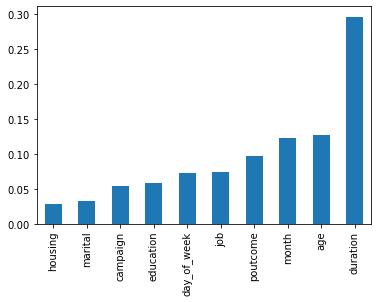

In [41]:
# splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# selecting the data
rfc = RandomForestClassifier(random_state=42)
# fitting the data
rfc.fit(X_train, y_train)
# predicting the data
y_pred = rfc.predict(X_test)
# feature importances
rfc_importances = pd.Series(rfc.feature_importances_, index=X.columns).sort_values().tail(10)
# plotting bar chart according to feature importance
rfc_importances.plot(kind='bar')
plt.show()

'duration' is the feature which have the highest importance in our model.

In [42]:
# Dividing the data into train and test subsets
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((26360, 13), (6590, 13), (26360,), (6590,))

In [43]:
rfcmodel = RandomForestClassifier()
# selecting the parameter
param_grid = { 
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
             }
# using grid search with respective parameters
grid_search_model = GridSearchCV(rfcmodel, param_grid=param_grid)
# fitting the model
grid_search_model.fit(x_train, y_train)
# printing the best parameters
print('Best Parameters are:',grid_search_model.best_params_)

Best Parameters are: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}


Using SMOTE as we have imbalance y (target) variable

In [48]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import roc_auc

              precision    recall  f1-score   support

           0       0.96      0.80      0.88      5798
           1       0.35      0.77      0.48       792

    accuracy                           0.80      6590
   macro avg       0.66      0.79      0.68      6590
weighted avg       0.89      0.80      0.83      6590

[[4652 1146]
 [ 180  612]]


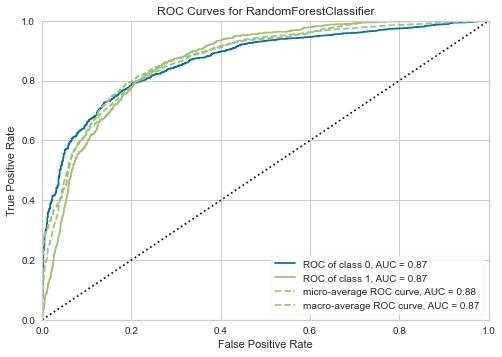

In [49]:
# A function to use smote
def grid_search_random_forrest_best(dataframe,target):
    
    # splitting the data
    x_train,x_val,y_train,y_val = train_test_split(dataframe,target,test_size=0.2,random_state=42)
    
    # Applying Smote on train data for dealing with class imbalance
    smote = SMOTE()
    
    X_sm, y_sm =  smote.fit_resample(x_train, y_train)
    
    rfc = RandomForestClassifier(n_estimators=11, max_features='log2', max_depth=8, criterion='entropy',random_state=42)
    
    rfc.fit(X_sm, y_sm)
    y_pred = rfc.predict(x_val)
    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))
    visualizer = roc_auc(rfc,X_sm,y_sm,x_val,y_val)
    
grid_search_random_forrest_best(X2,y)    

**Conclusion Part:**

    *Outcomes:*
     1. Random Forest Classification is the best suit for this dataset, which gives the highest accuracy and precision although Decision Tree and Logistic Regression models have significant AUC of ROC curve.
    2. Duration is the most important feature which influence the customers to suscribing in a term deposite.
    
    *Chalanges which we have faced:*
    1. We have some missing values and outliers in our dataset which we needs to be treated accordingly.
    2. The Recurssive feature elemination is computationally expensive although, after using this the accuracy of our model does not increased significantly.
    
    *Final Verdict:*
    Random Forest Regression is the best fit for this dataset and Duration is the most influencing feature for suscribing in a term deposite. So the Bank should reach his customers between short durations to get a large number of customers suscribed to his term deposite scheme.
    
    
                                          **THANK YOU**